In [ ]:
#needed pythonlibraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#loading our data set and seperating into train and test set
AAPL_d = pd.read_csv("/content/AAPL-daily.csv")
AAPLd_train = AAPL_d.iloc[:, 1:2].iloc[0:801, :]
AAPLd_test = AAPL_d.iloc[:, 1:2].iloc[801:1006, :]
AAPLd_train
AAPLd_test

,Open
801,153.559998
802,150.210007
803,147.809998
804,151.279999
805,151.190002
...,...
1001,195.179993
1002,193.610001
1003,192.490005
1004,194.139999


In [ ]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
AAPLd_train_scaled = sc.fit_transform(AAPLd_train)

In [ ]:
#timesteps(here we just put our train data into 740 time steps) think of it as a 60 inch block moving down a 800 inch line inch by inch

X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(AAPLd_train_scaled[i-60:i, 0])
    y_train.append(AAPLd_train_scaled[i, 0])
#so for x train were taking blocks out of the training set and were putting them together to form an array of arrays really were taking them by every 60 values
#, but Y is just one lng array of response values. 740 time steps


X_train, y_train = np.array(X_train), np.array(y_train)
# just makes them arrays

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#makes X_train a 3 dimensional array or a tensor i think

# makes them a 3d array

In [ ]:
np.shape(X_train) # does make it a 3 dimensional array

(740, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
#building network architecture and stuff
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 12s 145ms/step - loss: 0.0866
Epoch 2/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0160
Epoch 3/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0106
Epoch 4/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0093
Epoch 5/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0088
Epoch 6/100
24/24 [==============================] - 4s 155ms/step - loss: 0.0082
Epoch 7/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0086
Epoch 8/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0072
Epoch 9/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0073
Epoch 10/100
24/24 [==============================] - 4s 165ms/step - loss: 0.0067
Epoch 11/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0082
Epoch 12/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0064
Epoch 13/100

In [ ]:
dataset_total = pd.concat((AAPLd_train['Open'], AAPLd_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(AAPLd_test) - 60 :].values
# so I think it takes the inputs are the open values from where the times steps ended. I believe it does this to analyze the previous time step and predict next
# so for 741 we look at traina nd predict, for 741 we look at train+741 and predict
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# transforming for predictions
X_test = []
# for collecting predictions on our data set
for i in range(60, 265):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test) # 205 time steps
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # into 3d matrix to feed to lstm
predicted_stock_price = model.predict(X_test) # but then why do we need the test set to have the actual values. maybe its going previous predict 1 but
#not using its own previous predictions
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


#dataset_total
#len(dataset_total)
#predicted_stock_price
#len(dataset_total) - len(AAPLd_test) - 60

1/7 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


7/7 [==============================] - 0s 35ms/step


In [ ]:
len(predicted_stock_price)

205

In [ ]:
k = np.arange(1,206,1)
AAPLd_test_plot = AAPLd_test.set_index(k)
AAPLd_test_plot

,Open
1,153.559998
2,150.210007
3,147.809998
4,151.279999
5,151.190002
...,...
201,195.179993
202,193.610001
203,192.490005
204,194.139999


In [ ]:
error = np.array((AAPLd_test - predicted_stock_price).loc[:, "Open"])
RMSE = np.sqrt(np.mean((error)**2))
error = np.array((AAPLd_test - predicted_stock_price).loc[:, "Open"])
RMSE

4.526205215945073

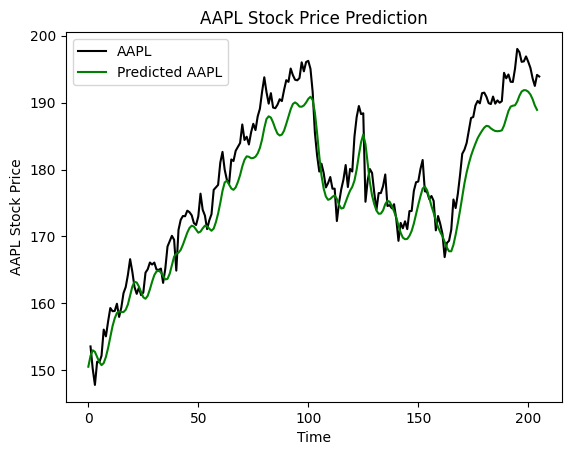

In [ ]:


plt.plot(AAPLd_test_plot, color = 'black', label = 'AAPL')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AAPL')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

In [ ]:
# function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def LSTM_stock_prediction(dataset, num_hidden_layers, units_per_layer, time_steps, train_percent, test_percent, n_splits=5):
    # Read the dataset
    data = pd.read_csv(dataset)

    # Splitting data into train and test sets
    train_length = int(len(data) * train_percent / 100)
    test_length = int(len(data) * test_percent / 100)
    train_data = data.iloc[:train_length, :]
    test_data = data.iloc[train_length:train_length + test_length, :]

    # Preprocessing
    sc = MinMaxScaler(feature_range=(0,1))
    train_scaled = sc.fit_transform(train_data.iloc[:, 1:2])

    X_train = []
    y_train = []
    for i in range(time_steps, len(train_scaled)):
        X_train.append(train_scaled[i-time_steps:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Initialize k-fold cross-validation
    kf = KFold(n_splits=n_splits)

    # Initialize list to store RMSE values
    rmse_values = []

    # Perform k-fold cross-validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Building the LSTM model
        model = Sequential()
        for _ in range(num_hidden_layers):
            model.add(LSTM(units=units_per_layer, return_sequences=True, input_shape=(X_train_fold.shape[1], 1)))
            model.add(Dropout(0.2))
        model.add(LSTM(units=units_per_layer))
        model.add(Dropout(0.2))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Training the model
        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

        # Making predictions on validation set
        predicted_stock_price = model.predict(X_val_fold)
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        # Calculating RMSE for this fold
        error = np.array((sc.inverse_transform(y_val_fold.reshape(-1, 1)) - predicted_stock_price[:, 0]))
        fold_rmse = np.sqrt(np.mean(error**2))
        rmse_values.append(fold_rmse)

    # Calculate mean RMSE across all folds
    mean_rmse = np.mean(rmse_values)

    # Training the final model on full training data
    model = Sequential()
    for _ in range(num_hidden_layers):
        model.add(LSTM(units=units_per_layer, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))
    model.add(LSTM(units=units_per_layer))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Making predictions on test set
    dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis=0)
    inputs = dataset_total[len(dataset_total) - len(test_data) - time_steps:].values.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(time_steps, len(inputs)):
        X_test.append(inputs[i-time_steps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)


    # Calculating RMSE on test set
    error = np.array((test_data['Open'].values - predicted_stock_price[:, 0]))
    final_rmse = np.sqrt(np.mean(error**2))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data['Open'], color='black', label='Actual Stock Price')
    plt.plot(test_data.index, predicted_stock_price[:, 0], color='green', label='Predicted Stock Price')

    # Add mean and final RMSE to the plot title
    plt.title(f'Stock Price Prediction\nMean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')

    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    return mean_rmse, final_rmse, predicted_stock_price


In [ ]:
#LSTM_stock_prediction(dataset, num_hidden_layers, units_per_layer, time_steps, train_percent, test_percent, n_splits=5)
#LSTM_stock_prediction("/content/AAPL-daily_switched.csv", 5, 50, 50, 70, 30, n_splits=5)

TypeError: LSTM_stock_prediction() missing 1 required positional argument: 'target_column'

In [ ]:
import numpy as np

import pandas as pd
import numpy as np

# Given numpy array of values
values_array = np.array([140.20378, 140.12808, 140.65656, 141.568, 142.67426, 143.9174, 145.37874, 146.90645, 147.95958, 148.58766,
                         149.10835, 149.6258, 149.78377, 149.03049, 147.22862, 144.75935, 142.22922, 140.06665, 138.81491, 139.03459,
                         140.84853, 143.73311, 146.64925, 148.75113, 149.77605, 149.79228, 149.18878, 148.45403, 147.86624, 147.32275,
                         146.52255, 145.5856, 144.90639, 144.79327, 145.22723, 145.75804, 145.82724, 145.25304, 144.22403, 143.16318,
                         142.4979, 142.3708, 142.37894, 141.94098, 140.73546, 138.85233, 136.75584, 134.90446, 133.5646, 132.75032,
                         132.17534, 131.61717, 131.0375, 130.40118, 129.69106, 128.91302, 128.2147, 127.828606, 127.92706, 128.5755,
                         129.7149, 131.14426, 132.6356, 133.95602, 134.92542, 135.56506, 136.1242, 136.91504, 138.02867, 139.40335,
                         140.9132, 142.26714, 143.22859, 143.76744, 144.22906, 145.15456, 146.68636, 148.6075, 150.35098, 151.3617,
                         151.47858, 151.05396, 150.57802, 150.47345, 150.82632, 151.37413, 151.58893, 151.17047, 150.23715, 149.03175,
                         147.8565, 146.94281, 146.3129, 145.87878, 145.75612, 146.22064, 147.28508, 148.67197, 149.8506, 150.32382,
                         150.04927, 149.42583, 148.96548, 149.11293, 149.94934, 151.30585, 152.9242, 154.43828, 155.57413, 156.31143,
                         156.67407, 156.68294, 156.5828, 156.73363, 157.45961, 158.8369, 160.52986, 161.88995, 162.52934, 162.34755,
                         161.50429, 160.32018, 159.4335, 159.34154, 160.08455, 161.33195, 162.65825, 163.64717, 164.00008, 163.72841,
                         163.01376, 162.13269, 161.61809, 161.91763, 163.03748, 164.442, 165.4269, 165.54808, 165.3525, 165.56749,
                         166.34924, 167.44823, 168.47992, 169.09317, 169.16104, 168.83315, 168.43196, 168.37242, 168.84755, 169.6274,
                         170.12692, 170.02357, 169.51254, 169.14056, 169.41556, 170.37592, 171.8019, 173.33255, 174.46558, 174.89293,
                         174.59818, 174.07576, 173.85776, 174.36624, 175.50468, 176.81165, 177.97044, 178.7374, 179.04521, 178.93095,
                         178.81274, 178.99538, 179.34595, 179.83015, 180.50275, 181.3097, 182.43584, 183.66502, 184.45789, 184.60384,
                         184.21825, 183.4618, 182.57582, 181.99149, 182.0177, 182.59167, 183.63216, 184.81012, 185.81042, 186.24133,
                         185.92305, 185.19553, 184.62993, 184.63219, 185.04651, 185.72008, 186.51224, 187.1361, 187.10948, 186.29195,
                         184.31284, 181.35321, 178.26868, 175.8244, 174.42108, 174.00217, 174.28062, 174.6948, 174.71461, 174.0116,
                         172.7477, 171.451, 170.68748, 170.94681, 171.85374, 172.77878, 173.43788, 174.14429, 175.43181, 177.33171,
                         179.396, 181.03902, 181.35223, 179.89226, 177.3916, 175.03978, 173.51303, 172.79945, 172.64183, 172.7059,
                         172.9439, 173.43138, 173.82626, 173.64384, 172.84792, 171.86928, 170.8965, 169.89244, 168.88026, 168.036,
                         167.68954, 167.9019, 168.50888, 169.29173, 170.20068, 171.26178, 172.31186, 173.18878, 173.86278, 174.21683,
                         174.2186, 173.87611, 173.25658, 172.53229, 171.75058, 170.98955, 170.40056, 169.95105, 169.28363, 168.29825,
                         167.31544, 166.73842, 166.92456, 168.08481, 169.8723, 171.71213, 173.29173, 174.55278, 175.44246, 176.25111,
                         177.04771, 177.92949, 178.9246, 180.04854, 181.16132, 182.20407, 183.02296, 183.55983, 183.73454, 183.594,
                         183.36902, 183.18053, 183.11119, 183.27661, 183.48637, 183.87036, 184.387, 185.00046, 185.71492, 186.15941,
                         186.23683, 186.41504, 186.99141, 187.75955, 188.16573, 188.10736, 187.64641, 187.02339, 186.42564, 185.94705,
                         185.64644])

# Convert the numpy array to a pandas DataFrame
values_df = pd.DataFrame({'Values': values_array})

# Display the DataFrame
print(values_df)

values_df['Close_Lag'] = values_df['Values'].shift(1)

# Calculate returns
values_df['Returns'] = (values_df['Values'] - values_df['Close_Lag']) / values_df['Close_Lag']

cor = values_df.iloc[:, 2].dropna()
# Display the DataFrame with Returns column added
np.average(values_df.iloc[:, 2].dropna())

AAPL_ds = pd.read_csv("/content/AAPL-daily_switched.csv")
AAPL_ds
AAPL_ds['Close_Lag'] = AAPL_ds['Open'].shift(1)

# Calculate returns
AAPL_ds['Returns'] = (AAPL_ds['Open'] - AAPL_ds['Close_Lag']) / AAPL_ds['Close_Lag']

# Display the DataFrame with Returns column added
np.average(AAPL_ds.iloc[706:1006, 7])

values_df.iloc[:, 2]

import matplotlib.pyplot as plt

# Sample data
x_values = np.arange(1, 302, 1)
y1_values = AAPL_ds.iloc[704:1005, 7]
y2_values = values_df.iloc[:, 2]

# Plotting
plt.figure(figsize=(8, 5))  # Set the figure size (width, height)
plt.plot(x_values, y1_values, linestyle='-', color='green') #label='Actual', marker='o')  # Plot y1_values with markers
plt.plot(x_values, y2_values, linestyle='-', color='red')#, label='Predicted', marker='s')  # Plot y2_values with markers
plt.xlabel('X Axis')  # Set the label for the x-axis
plt.ylabel('Y Axis')  # Set the label for the y-axis
plt.title('Plot of Y1 Values and Y2 Values')  # Set the title of the plot
plt.legend()  # Show the legend (labels) for the lines
plt.grid(True)  # Show a grid in the plot
plt.show()  # Display the plot


        Values
0    140.20378
1    140.12808
2    140.65656
3    141.56800
4    142.67426
..         ...
296  187.64641
297  187.02339
298  186.42564
299  185.94705
300  185.64644

[301 rows x 1 columns]


In [ ]:
values_df['Close_Lag'] = values_df['Values'].shift(1)

# Calculate returns
values_df['Returns'] = (values_df['Values'] - values_df['Close_Lag']) / values_df['Close_Lag']

cor = values_df.iloc[:, 2].dropna()
# Display the DataFrame with Returns column added
np.average(values_df.iloc[:, 2].dropna())

NameError: name 'values_df' is not defined

In [ ]:
AAPL_ds = pd.read_csv("/content/AAPL-daily_switched.csv")
AAPL_ds
AAPL_ds['Close_Lag'] = AAPL_ds['Open'].shift(1)

# Calculate returns
AAPL_ds['Returns'] = (AAPL_ds['Open'] - AAPL_ds['Close_Lag']) / AAPL_ds['Close_Lag']

# Display the DataFrame with Returns column added
np.average(AAPL_ds.iloc[706:1006, 7])

0.0010958964430617054

In [ ]:
values_df.iloc[:, 2]

0           NaN
1     -0.000540
2      0.003771
3      0.006480
4      0.007814
         ...   
296   -0.002450
297   -0.003320
298   -0.003196
299   -0.002567
300   -0.001617
Name: Returns, Length: 301, dtype: float64

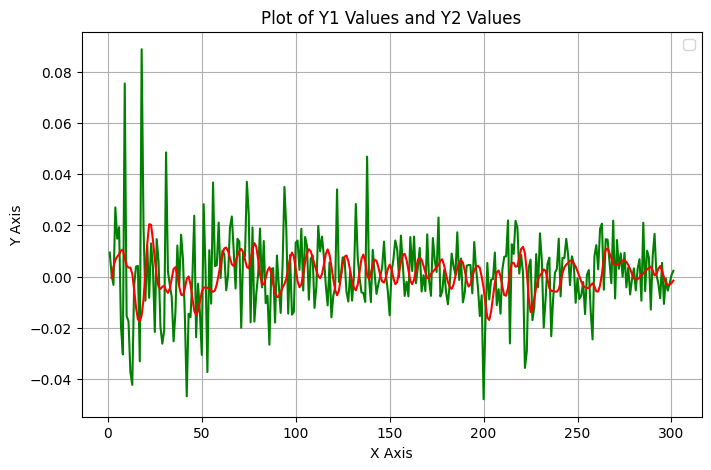

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x_values = np.arange(1, 302, 1)
y1_values = AAPL_ds.iloc[704:1005, 7]
y2_values = values_df.iloc[:, 2]

# Plotting
plt.figure(figsize=(8, 5))  # Set the figure size (width, height)
plt.plot(x_values, y1_values, linestyle='-', color='green') #label='Actual', marker='o')  # Plot y1_values with markers
plt.plot(x_values, y2_values, linestyle='-', color='red')#, label='Predicted', marker='s')  # Plot y2_values with markers
plt.xlabel('X Axis')  # Set the label for the x-axis
plt.ylabel('Y Axis')  # Set the label for the y-axis
plt.title('Plot of Y1 Values and Y2 Values')  # Set the title of the plot
plt.legend()  # Show the legend (labels) for the lines
plt.grid(True)  # Show a grid in the plot
plt.show()  # Display the plot


So our average return for our model was .0009 while the true average return was 0.0010958964430617054. our RMSE for return was.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def LSTM_stock_prediction(dataset, num_hidden_layers, units_per_layer, time_steps, train_percent, test_percent, target_column, n_splits=5):
    # Read the dataset
    data = pd.read_csv(dataset)

    # Splitting data into train and test sets
    train_length = int(len(data) * train_percent / 100)
    test_length = int(len(data) * test_percent / 100)
    train_data = data.iloc[:train_length, :]
    test_data = data.iloc[train_length:train_length + test_length, :]

    # Preprocessing
    sc = MinMaxScaler(feature_range=(0,1))
    train_scaled = sc.fit_transform(train_data[target_column].values.reshape(-1, 1))

    X_train = []
    y_train = []
    for i in range(time_steps, len(train_scaled)):
        X_train.append(train_scaled[i-time_steps:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Initialize k-fold cross-validation
    kf = KFold(n_splits=n_splits)

    # Initialize list to store RMSE values
    rmse_values = []

    # Perform k-fold cross-validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Building the LSTM model
        model = Sequential()
        for _ in range(num_hidden_layers):
            model.add(LSTM(units=units_per_layer, return_sequences=True, input_shape=(X_train_fold.shape[1], 1)))
            model.add(Dropout(0.2))
        model.add(LSTM(units=units_per_layer))
        model.add(Dropout(0.2))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Training the model
        model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

        # Making predictions on validation set
        predicted_stock_price = model.predict(X_val_fold)
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        # Calculating RMSE for this fold
        error = np.array((sc.inverse_transform(y_val_fold.reshape(-1, 1)) - predicted_stock_price[:, 0]))
        fold_rmse = np.sqrt(np.mean(error**2))
        rmse_values.append(fold_rmse)

    # Calculate mean RMSE across all folds
    mean_rmse = np.mean(rmse_values)

    # Training the final model on full training data
    model = Sequential()
    for _ in range(num_hidden_layers):
        model.add(LSTM(units=units_per_layer, return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.2))
    model.add(LSTM(units=units_per_layer))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Making predictions on test set
    dataset_total = pd.concat((train_data[target_column], test_data[target_column]), axis=0)
    inputs = dataset_total[len(dataset_total) - len(test_data) - time_steps:].values.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(time_steps, len(inputs)):
        X_test.append(inputs[i-time_steps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Create a DataFrame for predicted prices
    predicted_df = pd.DataFrame({
        'Date': test_data.index,
        'Actual_Price': test_data[target_column].values,
        'Predicted_Price': predicted_stock_price[:, 0]
    })

    # Calculating RMSE on test set
    error = np.array((test_data[target_column].values - predicted_stock_price[:, 0]))
    final_rmse = np.sqrt(np.mean(error**2))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data[target_column], color='black', label='Actual Stock Price')
    plt.plot(test_data.index, predicted_stock_price[:, 0], color='green', label='Predicted Stock Price')

    # Add mean and final RMSE to the plot title
    plt.title(f'Stock Price Prediction\nMean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')

    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    return mean_rmse, final_rmse, predicted_df


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def calculate_and_plot_returns(df1, df2):
    # Calculate returns for df1
    df1['Close_Lag'] = df1.iloc[:, 0].shift(1)
    df1['Returns'] = (df1.iloc[:, 0] - df1['Close_Lag']) / df1['Close_Lag']

    # Calculate returns for df2
    df2['Close_Lag'] = df2.iloc[:, 0].shift(1)
    df2['Returns'] = (df2.iloc[:, 0] - df2['Close_Lag']) / df2['Close_Lag']

    # Calculate RMSE between the two DataFrames
    rmse = np.sqrt(mean_squared_error(df1['Returns'].dropna(), df2['Returns'].dropna()))

    # Calculate averages
    avg_df1 = np.average(df1['Returns'].dropna())
    avg_df2 = np.average(df2['Returns'].dropna())

    # Sample data for plotting
    x_values = np.arange(1, len(df1) + 1)
    y1_values = df1['Returns']
    y2_values = df2['Returns']

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y1_values, linestyle='-', color='green', label=f'DataFrame 1 (Avg: {avg_df1:.4f})')
    plt.plot(x_values, y2_values, linestyle='-', color='red', label=f'DataFrame 2 (Avg: {avg_df2:.4f})')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title(f'Plot of Returns for DataFrame 1 and DataFrame 2\nRMSE: {rmse:.4f}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming df1 and df2 are your two DataFrames with single columns each
#df1 = pd.DataFrame(predicted_prices.iloc[:, 1])
#df2 = pd.DataFrame(predicted_prices.iloc[:, 2])
#calculate_and_plot_returns(df1, df2)

10/10 [==============================] - 2s 30ms/step


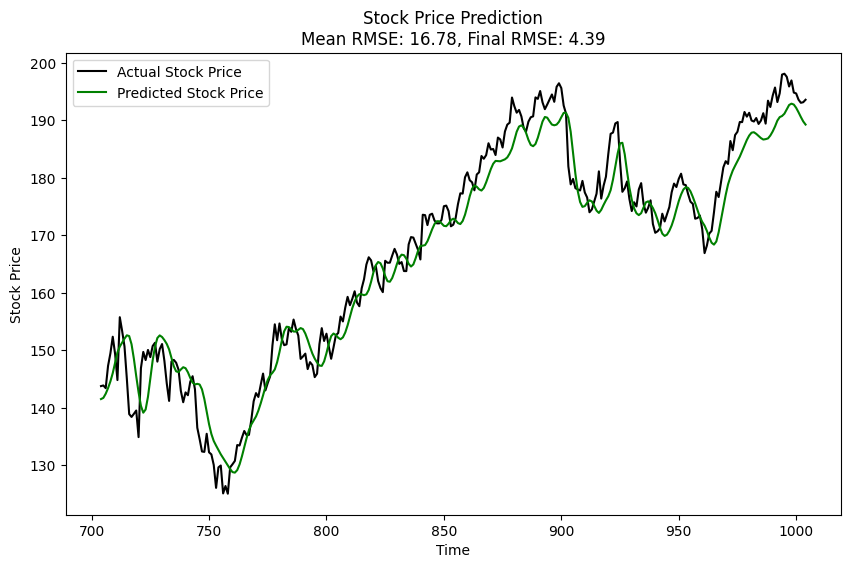

Mean RMSE: 16.78, Final RMSE: 4.39
     Date  Actual_Price  Predicted_Price
0     704    143.750000       141.492630
1     705    143.860001       141.700119
2     706    143.389999       142.417999
3     707    147.270004       143.393127
4     708    149.449997       144.570526
..    ...           ...              ...
296  1000    194.679993       192.172958
297  1001    193.600006       191.406311
298  1002    193.050003       190.580078
299  1003    193.149994       189.815140
300  1004    193.580002       189.262817

[301 rows x 3 columns]


In [ ]:
# Example call to LSTM_stock_prediction function
#LSTM_stock_prediction(dataset, num_hidden_layers, units_per_layer, time_steps, train_percent, test_percent, n_splits=5)
#LSTM_stock_prediction("/content/AAPL-daily_switched.csv", 5, 50, 50, 70, 30, n_splits=5)
mean_rmse, final_rmse, predicted_prices = LSTM_stock_prediction(
    dataset="/content/AAPL-daily.csv",
    num_hidden_layers=4,
    units_per_layer=50,
    time_steps=50,
    train_percent=70,
    test_percent=30,
    target_column='Close'
)

print(f'Mean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')
print(predicted_prices)

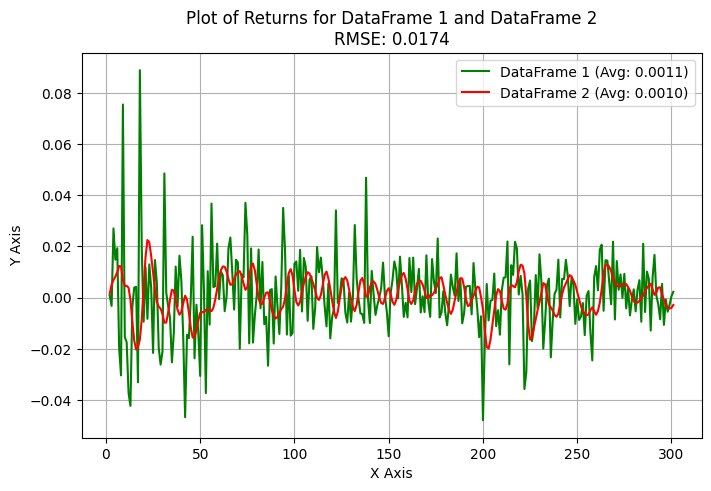

In [ ]:
df1 = pd.DataFrame(predicted_prices.iloc[:, 1])
df2 = pd.DataFrame(predicted_prices.iloc[:, 2])
calculate_and_plot_returns(df1, df2)

10/10 [==============================] - 2s 20ms/step


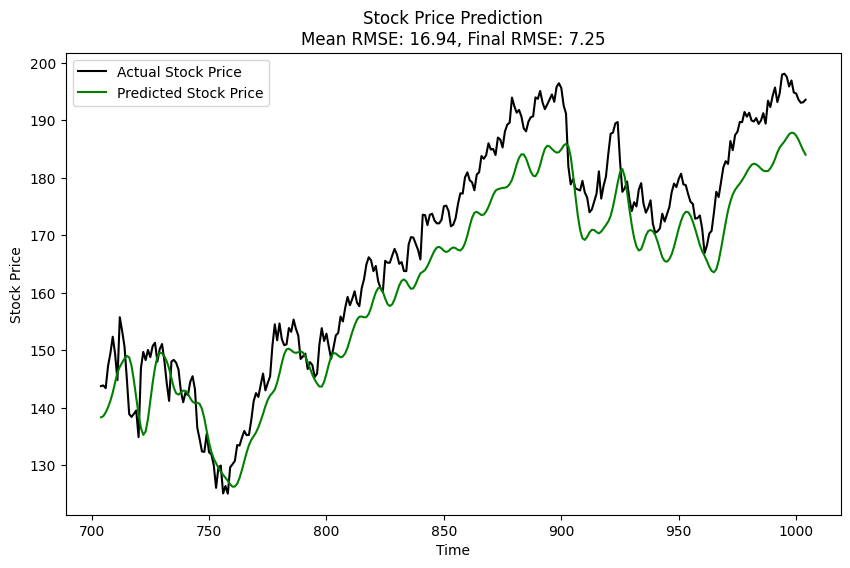

Mean RMSE: 16.78, Final RMSE: 4.39
     Date  Actual_Price  Predicted_Price
0     704    143.750000       141.492630
1     705    143.860001       141.700119
2     706    143.389999       142.417999
3     707    147.270004       143.393127
4     708    149.449997       144.570526
..    ...           ...              ...
296  1000    194.679993       192.172958
297  1001    193.600006       191.406311
298  1002    193.050003       190.580078
299  1003    193.149994       189.815140
300  1004    193.580002       189.262817

[301 rows x 3 columns]


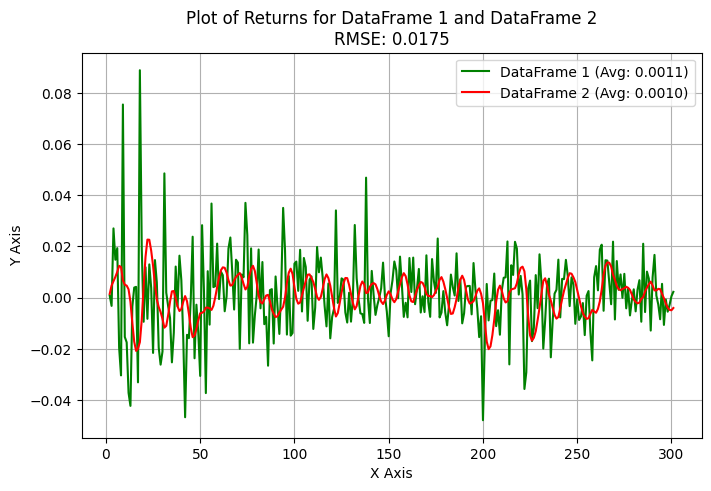

In [ ]:
mean_rmse2, final_rmse2, predicted_prices2 = LSTM_stock_prediction(
    dataset="/content/AAPL-daily.csv",
    num_hidden_layers=3,
    units_per_layer=50,
    time_steps=40,
    train_percent=70,
    test_percent=30,
    target_column='Close'
)

print(f'Mean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')
print(predicted_prices)

df1 = pd.DataFrame(predicted_prices2.iloc[:, 1])
df2 = pd.DataFrame(predicted_prices2.iloc[:, 2])
calculate_and_plot_returns(df1, df2)

10/10 [==============================] - 3s 53ms/step


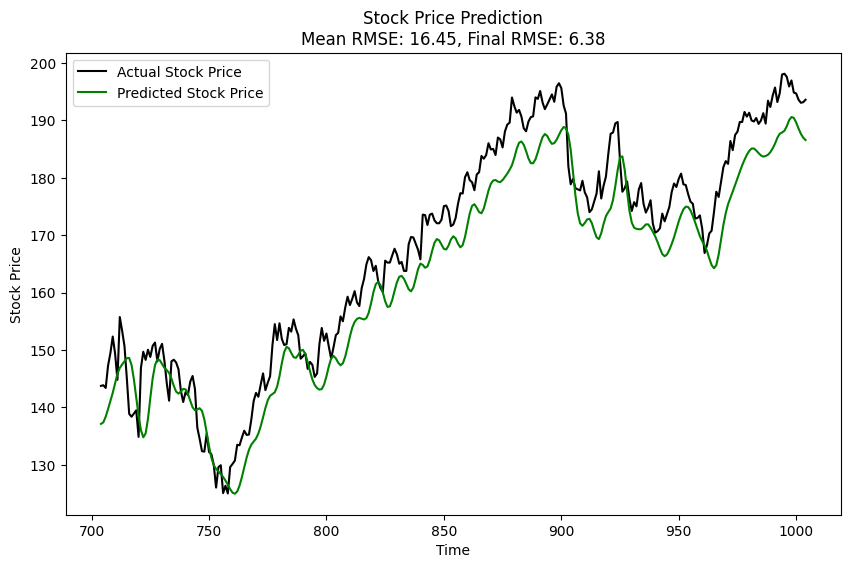

Mean RMSE: 16.78, Final RMSE: 4.39
     Date  Actual_Price  Predicted_Price
0     704    143.750000       141.492630
1     705    143.860001       141.700119
2     706    143.389999       142.417999
3     707    147.270004       143.393127
4     708    149.449997       144.570526
..    ...           ...              ...
296  1000    194.679993       192.172958
297  1001    193.600006       191.406311
298  1002    193.050003       190.580078
299  1003    193.149994       189.815140
300  1004    193.580002       189.262817

[301 rows x 3 columns]


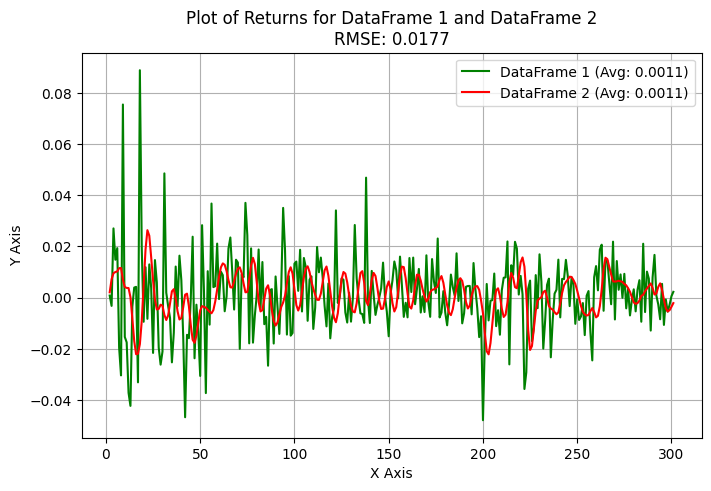

In [ ]:
mean_rmse3, final_rmse3, predicted_prices3 = LSTM_stock_prediction(
    dataset="/content/AAPL-daily.csv",
    num_hidden_layers=4,
    units_per_layer=50,
    time_steps=60,
    train_percent=70,
    test_percent=30,
    target_column='Close'
)

print(f'Mean RMSE: {mean_rmse:.2f}, Final RMSE: {final_rmse:.2f}')
print(predicted_prices)

df6 = pd.DataFrame(predicted_prices3.iloc[:, 1])
df7 = pd.DataFrame(predicted_prices3.iloc[:, 2])
calculate_and_plot_returns(df6, df7)